# Turkish Banknote Classifier

## Installation

In [1]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\Deniz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\Deniz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [58]:
import cv2
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split

## Dataset

In [4]:
# Dataset is from:
# https://www.kaggle.com/datasets/baltacifatih/turkish-lira-banknote-dataset

In [5]:
# Define a function to access folders easily
def read_data(i):

    # Path for folders in drive
    data_dir = "Dataset/" + str(i)
    image_arrays = []
    for filename in os.listdir(data_dir):

        # Check what the filename ends with
        if filename.endswith(('.png', '.jpeg', '.jpg')):
            image_path = os.path.join(data_dir, filename)
            image = cv2.imread(image_path)

            # Resize the image format as 50x28
            image = cv2.resize(image, (50, 28))
            image_arrays.append(image)
    image_arrays = np.array(image_arrays)
    return image_arrays

In [6]:
# Use the read() for each banknote type
array_5 = read_data(5)
array_5.shape

(1000, 28, 50, 3)

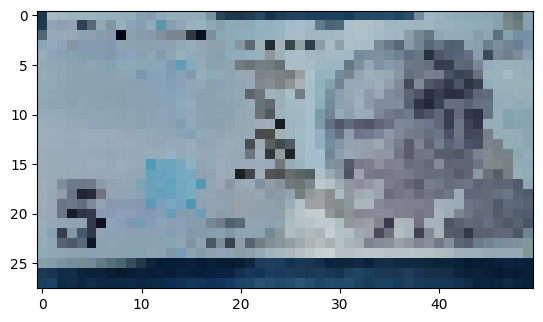

In [7]:
plt.imshow(array_5[0])

In [8]:
array_10 = read_data(10)
array_10.shape

(1000, 28, 50, 3)

In [9]:
array_20 = read_data(20)
array_20.shape

(1000, 28, 50, 3)

In [10]:
array_50 = read_data(50)
array_50.shape

(1000, 28, 50, 3)

In [11]:
array_100 = read_data(100)
array_100.shape

(1000, 28, 50, 3)

In [12]:
array_200 = read_data(200)
array_200.shape

(1000, 28, 50, 3)

In [13]:
# Combine different banknote array types as x
x = np.vstack((array_5, array_10, array_20, array_50, array_100, array_200))

# Create y dataset for labels
# 0 for 5, 1 for 10, 2 for 20 . . .
y = np.vstack((
    np.zeros(shape=(len(array_5), 1)), np.ones(shape=(len(array_10), 1)), 2*np.ones(shape=(len(array_20), 1)),
    3*np.ones(shape=(len(array_50), 1)), 4*np.ones(shape=(len(array_100), 1)), 5*np.ones(shape=(len(array_200), 1))
))

In [14]:
# Class names:
class_names = [
    "5", "10", "20", "50", "100", "200"
]

In [15]:
# Normalize pixel values
x = x / 255.0

In [16]:
# Split the data randomly to:
# train_images, test_images, train_labels, test_labels
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Check results:
print("Train Image Shape   :  " + str(train_images.shape))
print("Test  Image Shape   :  " + str(test_images.shape))
print("Train Label Shape   :  " + str(train_labels.shape))
print("Test  Label Shape   :  " + str(test_labels.shape))

Train Image Shape   :  (4800, 28, 50, 3)
Test  Image Shape   :  (1200, 28, 50, 3)
Train Label Shape   :  (4800, 1)
Test  Label Shape   :  (1200, 1)


## CNN Model

In [18]:
# Build the model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 50, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(6, activation="softmax")
])

# Compile the model
model_cnn.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [19]:
# Train the model
history_cnn = model_cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10


150/150 [==============================] - 3s 12ms/step - loss: 1.4540 - accuracy: 0.4179
Epoch 2/10
150/150 [==============================] - 2s 13ms/step - loss: 0.7105 - accuracy: 0.7423
Epoch 3/10
150/150 [==============================] - 2s 13ms/step - loss: 0.4250 - accuracy: 0.8596
Epoch 4/10
150/150 [==============================] - 2s 12ms/step - loss: 0.2621 - accuracy: 0.9210
Epoch 5/10
150/150 [==============================] - 2s 13ms/step - loss: 0.1895 - accuracy: 0.9400
Epoch 6/10
150/150 [==============================] - 2s 13ms/step - loss: 0.1479 - accuracy: 0.9558
Epoch 7/10
150/150 [==============================] - 2s 12ms/step - loss: 0.1171 - accuracy: 0.9640
Epoch 8/10
150/150 [==============================] - 2s 12ms/step - loss: 0.0920 - accuracy: 0.9737
Epoch 9/10
150/150 [==============================] - 2s 12ms/step - loss: 0.0759 - accuracy: 0.9771
Epoch 10/10
150/150 [==============================] - 2s 12ms/step - loss: 0.0578 - accu

In [20]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images,  test_labels)

38/38 [==============================] - 0s 5ms/step - loss: 0.0740 - accuracy: 0.9800


## ANN

In [21]:
# Firstly, build the model
model_simple = models.Sequential([
    layers.Flatten(input_shape=(28, 50, 3)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(6, activation="softmax")
])

# Compile the model
model_simple.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [22]:
# Train the model
history_simple = model_simple.fit(train_images, train_labels, epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 6ms/step - loss: 1.6639 - accuracy: 0.3171
Epoch 2/10
150/150 [==============================] - 1s 6ms/step - loss: 1.3003 - accuracy: 0.5206
Epoch 3/10
150/150 [==============================] - 1s 6ms/step - loss: 1.0872 - accuracy: 0.6142
Epoch 4/10
150/150 [==============================] - 1s 6ms/step - loss: 0.8434 - accuracy: 0.6998
Epoch 5/10
150/150 [==============================] - 1s 6ms/step - loss: 0.7326 - accuracy: 0.7421
Epoch 6/10
150/150 [==============================] - 1s 6ms/step - loss: 0.6608 - accuracy: 0.7754
Epoch 7/10
150/150 [==============================] - 1s 6ms/step - loss: 0.5992 - accuracy: 0.7860
Epoch 8/10
150/150 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.8373
Epoch 9/10
150/150 [==============================] - 1s 6ms/step - loss: 0.4469 - accuracy: 0.8542
Epoch 10/10
150/150 [==============================] - 1s 6ms/step - loss: 0.4153 - accuracy: 0.8654

In [23]:
test_loss_simple, test_acc_simple = model_simple.evaluate(test_images,  test_labels)

38/38 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8733


## Comparision

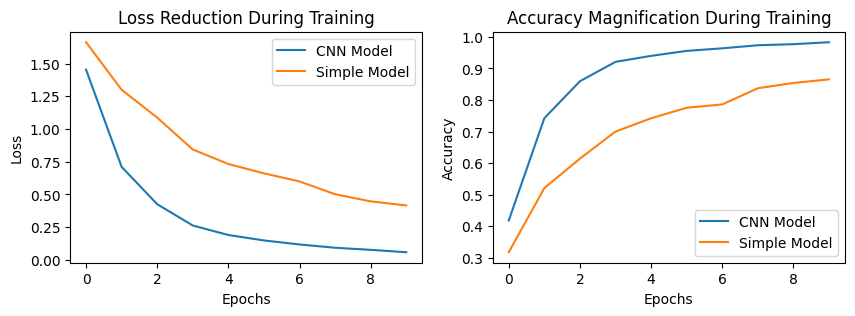

In [24]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title("Loss Reduction During Training")
plt.plot(history_cnn.history["loss"], label="CNN Model")
plt.plot(history_simple.history["loss"], label="Simple Model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Magnification During Training")
plt.plot(history_cnn.history["accuracy"], label="CNN Model")
plt.plot(history_simple.history["accuracy"], label="Simple Model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [25]:
print("Test Loss Values")
print("CNN Model    :" + str(test_loss_cnn))
print("Simple Model :" + str(test_loss_simple))
print()
print("Test Accuracy Values")
print("CNN Model    :" + str(test_acc_cnn))
print("Simple Model :" + str(test_acc_simple))

Test Loss Values
CNN Model    :0.0740111768245697
Simple Model :0.39266836643218994

Test Accuracy Values
CNN Model    :0.9800000190734863
Simple Model :0.8733333349227905


## Activasion Functions and Optimizers

In [62]:
history_list = []

In [63]:
# Activation Functions: ReLU and Sigmoid
activation_functions = ["relu", "sigmoid"]

# Optimizers: Adam and RMSProp
optimizers = ["adam", "rmsprop"]

In [64]:
for activation_function in activation_functions:
    for optimizer in optimizers:
        # Build the model
        model = models.Sequential([
            layers.Flatten(input_shape=(28, 50, 3)),
            layers.Dense(128, activation=activation_function),
            layers.Dense(64, activation=activation_function),
            layers.Dense(6, activation="softmax")
        ])

        # Compile the model
        model.compile(optimizer=optimizer,
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

        # Train the model
        history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=0)

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)

        # Print results
        print(f"Activation Function: {activation_function}, Optimizer: {optimizer}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Test Loss: {test_loss}\n")

        history_list.append([activation_function, optimizer, history, test_loss, test_accuracy])


38/38 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8792
Activation Function: relu, Optimizer: adam
Test Accuracy: 0.8791666626930237
Test Loss: 0.42653942108154297

38/38 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7775
Activation Function: relu, Optimizer: rmsprop
Test Accuracy: 0.7774999737739563
Test Loss: 0.6171718835830688

38/38 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.7225
Activation Function: sigmoid, Optimizer: adam
Test Accuracy: 0.7225000262260437
Test Loss: 0.7963235378265381

38/38 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.6467
Activation Function: sigmoid, Optimizer: rmsprop
Test Accuracy: 0.6466666460037231
Test Loss: 0.9198641777038574



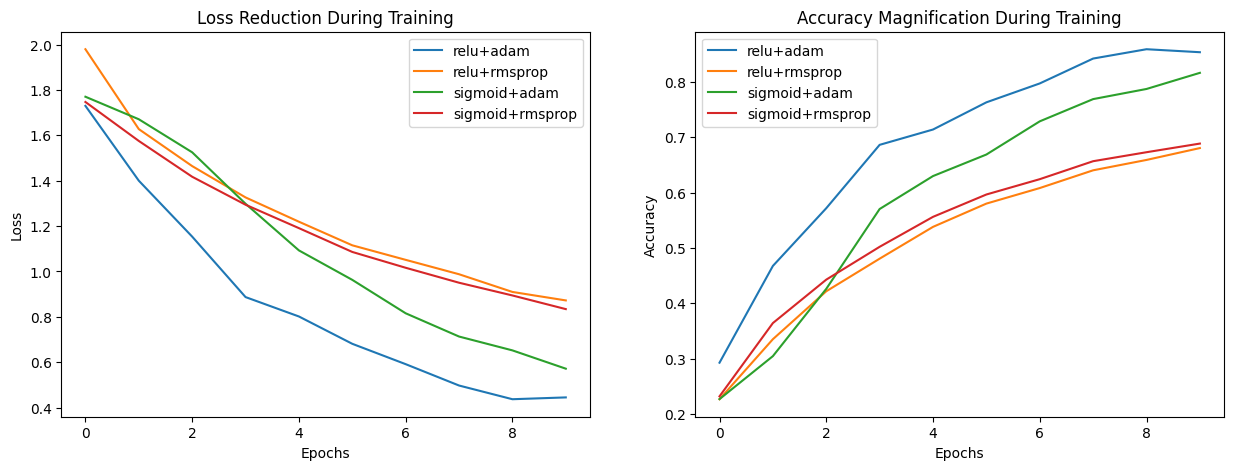

In [65]:
# history_list.append([activation_function, optimizer, history, test_loss, test_accuracy])

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Loss Reduction During Training")
for i in history_list:
    plt.plot(i[2].history["loss"], label=i[0] + "+" + i[1])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Magnification During Training")
for i in history_list:
    plt.plot(i[2].history["accuracy"], label=i[0] + "+" + i[1])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [66]:
print("Test Loss Values")
for i in history_list:
    print(i[0] + " + " + i[1] + " = " + str(i[3]))
print()
print("Test Accuracy Values")
for i in history_list:
    print(i[0] + " + " + i[1] + " = " + str(i[4]))

Test Loss Values
relu + adam = 0.42653942108154297
relu + rmsprop = 0.6171718835830688
sigmoid + adam = 0.7963235378265381
sigmoid + rmsprop = 0.9198641777038574

Test Accuracy Values
relu + adam = 0.8791666626930237
relu + rmsprop = 0.7774999737739563
sigmoid + adam = 0.7225000262260437
sigmoid + rmsprop = 0.6466666460037231


## Bonus

In [67]:
image_path = "sample_banknote.jpg"
banknote_image = cv2.imread(image_path)
banknote_image = cv2.resize(banknote_image, (50, 28))
banknote_image = banknote_image.reshape(1, 28, 50, 3)
banknote_image = banknote_image / 255.0

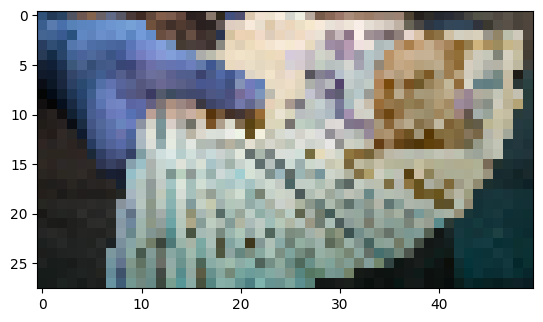

In [68]:
plt.imshow(banknote_image[0])
banknote_image = banknote_image / 255.0

In [69]:
predictions = model_cnn.predict(banknote_image)
prediction = predictions.argmax()
print(predictions)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[3.1884315e-06 3.0106060e-07 5.6264363e-03 7.4547929e-06 9.4130766e-01
  5.3054977e-02]]
4


In [70]:
print(class_names[prediction] + "'lik Banknot")

100'lik Banknot


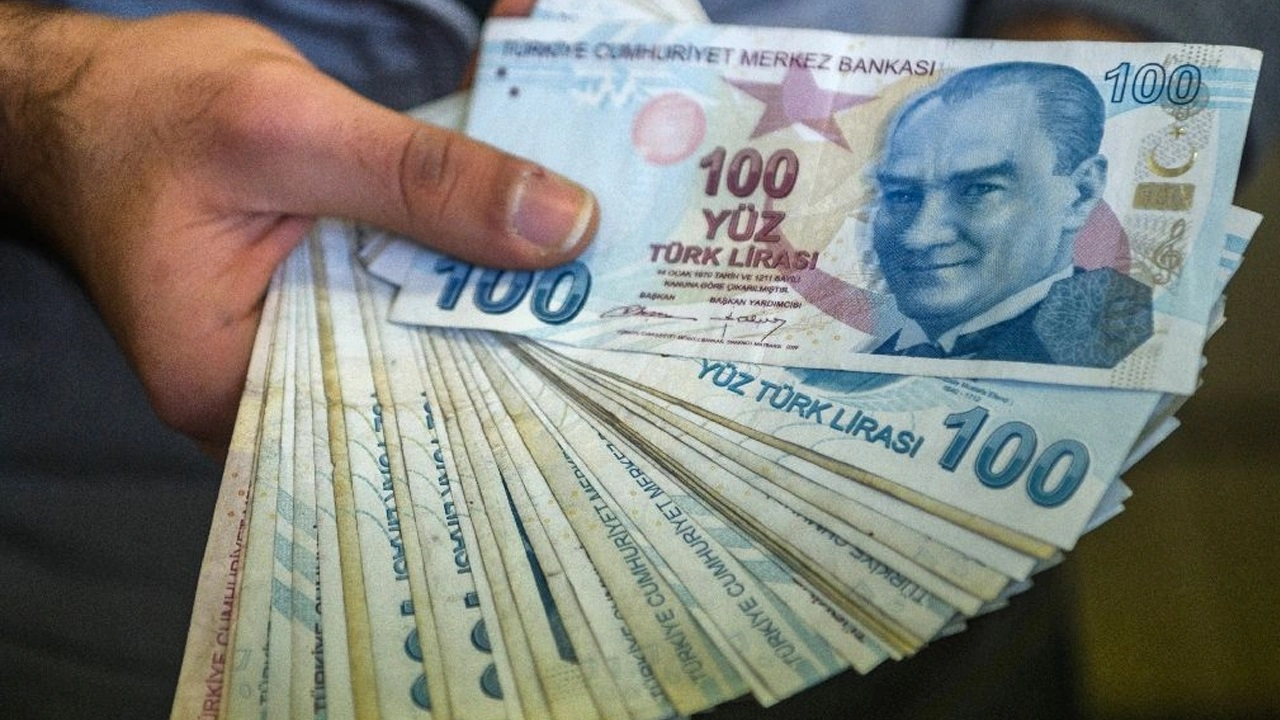

In [71]:
from IPython.display import Image
Image("sample_banknote.jpg", width=500)

In [72]:
# :)